In [1]:
import networkx as nx
import random
from math import sqrt
import torch
from torch_geometric.utils.convert import from_networkx
import numpy as np
from python_tsp.exact import solve_tsp_dynamic_programming


/home/pimenta/tcc/venv_tsp_gnn/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# TSP instance params
# num_nodes = int(random.uniform(20, 40))
# num_nodes = int(random.uniform(3, 5)) # for testing
num_nodes = 15 # for testing
nodes = range(num_nodes)
x_values = [random.uniform(0, sqrt(2)/2) for n in nodes]
y_values = [random.uniform(0, sqrt(2)/2) for n in nodes]
print(f"num_nodes: {num_nodes}")

num_nodes: 15


In [3]:
# create TSP instance graph
g = nx.Graph()
for node in nodes:
    g.add_node(node, x=x_values[node], y=y_values[node])
for src_node_id in nodes:
    for dst_node_id in nodes:
        if(src_node_id != dst_node_id ):
            x1 = g.nodes[src_node_id]["x"]
            y1 = g.nodes[src_node_id]["y"]
            x2 = g.nodes[dst_node_id]["x"]
            y2 = g.nodes[dst_node_id]["y"]
            euclidian_distance = sqrt((x1-x2)**2 + (y1-y2)**2)
            g.add_edge(src_node_id, dst_node_id, distance=euclidian_distance)

In [4]:
g.nodes(data=True)

NodeDataView({0: {'x': 0.32124177790660685, 'y': 0.541519589882083}, 1: {'x': 0.6607383046554917, 'y': 0.5262837073555002}, 2: {'x': 0.681636565697634, 'y': 0.47844742268152823}, 3: {'x': 0.6155100831456716, 'y': 0.31489004853165214}, 4: {'x': 0.5619820158052143, 'y': 0.12266343501897319}, 5: {'x': 0.25922890473714194, 'y': 0.28105844393920365}, 6: {'x': 0.011912740698645978, 'y': 0.5614976091269894}, 7: {'x': 0.520149765677851, 'y': 0.7028929822912131}, 8: {'x': 0.5015628086000667, 'y': 0.29983044326262825}, 9: {'x': 0.42461035937634584, 'y': 0.18798741957247186}, 10: {'x': 0.3111841504703455, 'y': 0.10616038989083285}, 11: {'x': 0.03136254506425151, 'y': 0.005078369954152562}, 12: {'x': 0.3810538983341947, 'y': 0.5435419928742612}, 13: {'x': 0.036291939677146605, 'y': 0.16941810355975914}, 14: {'x': 0.5258491136394103, 'y': 0.182405823217712}})

In [5]:
g.edges(data=True)

EdgeDataView([(0, 1, {'distance': 0.3398382317970126}), (0, 2, {'distance': 0.3658722472972147}), (0, 3, {'distance': 0.3714226493914689}), (0, 4, {'distance': 0.4831111058650873}), (0, 5, {'distance': 0.2677416758455995}), (0, 6, {'distance': 0.309973506146822}), (0, 7, {'distance': 0.25613621254488106}), (0, 8, {'distance': 0.3015448850569215}), (0, 9, {'distance': 0.36833416767778954}), (0, 10, {'distance': 0.43547535967798223}), (0, 11, {'distance': 0.609753353472565}), (0, 12, {'distance': 0.059846302006949764}), (0, 13, {'distance': 0.4686746488026402}), (0, 14, {'distance': 0.41331206036546825}), (1, 2, {'distance': 0.05220198699278421}), (1, 3, {'distance': 0.21617786892250287}), (1, 4, {'distance': 0.41552632747936885}), (1, 5, {'distance': 0.47047340843068414}), (1, 6, {'distance': 0.6497804485531178}), (1, 7, {'distance': 0.22573429798146716}), (1, 8, {'distance': 0.27679942081371234}), (1, 9, {'distance': 0.4125539781283521}), (1, 10, {'distance': 0.5465269513808176}), (1, 

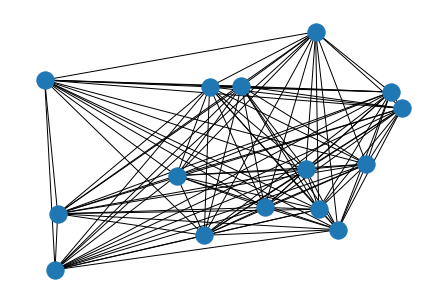

In [6]:
node_positions = {node_id: (x_values[node_id], y_values[node_id])
    for node_id in range(num_nodes)
}
nx.draw(g, pos=node_positions)

In [7]:
# Convert the graph into PyTorch geometric
pyg_graph = from_networkx(g)
pyg_graph


Data(x=[15], edge_index=[2, 210], y=[15], distance=[210])

In [8]:
pyg_graph.edge_index

tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,
          1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,
          2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
          3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,
          5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,
          6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
          7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
          9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10,
         10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11,
         11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
         12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14,
         14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14],
        [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11

In [9]:
pyg_graph.distance

tensor([0.3398, 0.3659, 0.3714, 0.4831, 0.2677, 0.3100, 0.2561, 0.3015, 0.3683,
        0.4355, 0.6098, 0.0598, 0.4687, 0.4133, 0.3398, 0.0522, 0.2162, 0.4155,
        0.4705, 0.6498, 0.2257, 0.2768, 0.4126, 0.5465, 0.8172, 0.2802, 0.7192,
        0.3694, 0.3659, 0.0522, 0.1764, 0.3754, 0.4663, 0.6749, 0.2765, 0.2536,
        0.3879, 0.5252, 0.8043, 0.3076, 0.7155, 0.3345, 0.3714, 0.2162, 0.1764,
        0.1995, 0.3579, 0.6520, 0.3995, 0.1149, 0.2292, 0.3690, 0.6612, 0.3275,
        0.5972, 0.1600, 0.4831, 0.4155, 0.3754, 0.1995, 0.3417, 0.7037, 0.5817,
        0.1872, 0.1521, 0.2513, 0.5435, 0.4581, 0.5278, 0.0698, 0.2677, 0.4705,
        0.4663, 0.3579, 0.3417, 0.3739, 0.4960, 0.2431, 0.1898, 0.1825, 0.3579,
        0.2894, 0.2493, 0.2843, 0.3100, 0.6498, 0.6749, 0.6520, 0.7037, 0.3739,
        0.5275, 0.5552, 0.5566, 0.5449, 0.5568, 0.3696, 0.3928, 0.6386, 0.2561,
        0.2257, 0.2765, 0.3995, 0.5817, 0.4960, 0.5275, 0.4035, 0.5237, 0.6323,
        0.8520, 0.2115, 0.7202, 0.5205, 

In [10]:
dict(nx.all_pairs_shortest_path(G=g))

{0: {0: [0],
  1: [0, 1],
  2: [0, 2],
  3: [0, 3],
  4: [0, 4],
  5: [0, 5],
  6: [0, 6],
  7: [0, 7],
  8: [0, 8],
  9: [0, 9],
  10: [0, 10],
  11: [0, 11],
  12: [0, 12],
  13: [0, 13],
  14: [0, 14]},
 1: {1: [1],
  0: [1, 0],
  2: [1, 2],
  3: [1, 3],
  4: [1, 4],
  5: [1, 5],
  6: [1, 6],
  7: [1, 7],
  8: [1, 8],
  9: [1, 9],
  10: [1, 10],
  11: [1, 11],
  12: [1, 12],
  13: [1, 13],
  14: [1, 14]},
 2: {2: [2],
  0: [2, 0],
  1: [2, 1],
  3: [2, 3],
  4: [2, 4],
  5: [2, 5],
  6: [2, 6],
  7: [2, 7],
  8: [2, 8],
  9: [2, 9],
  10: [2, 10],
  11: [2, 11],
  12: [2, 12],
  13: [2, 13],
  14: [2, 14]},
 3: {3: [3],
  0: [3, 0],
  1: [3, 1],
  2: [3, 2],
  4: [3, 4],
  5: [3, 5],
  6: [3, 6],
  7: [3, 7],
  8: [3, 8],
  9: [3, 9],
  10: [3, 10],
  11: [3, 11],
  12: [3, 12],
  13: [3, 13],
  14: [3, 14]},
 4: {4: [4],
  0: [4, 0],
  1: [4, 1],
  2: [4, 2],
  3: [4, 3],
  5: [4, 5],
  6: [4, 6],
  7: [4, 7],
  8: [4, 8],
  9: [4, 9],
  10: [4, 10],
  11: [4, 11],
  12: [4, 12],
 

In [11]:
distance_matrix = nx.floyd_warshall_numpy(G=g, weight="distance")
distance_matrix


array([[0.        , 0.33983823, 0.36587225, 0.37142265, 0.48311111,
        0.26774168, 0.30997351, 0.25613621, 0.30154489, 0.36833417,
        0.43547536, 0.60975335, 0.0598463 , 0.46867465, 0.41331206],
       [0.33983823, 0.        , 0.05220199, 0.21617787, 0.41552633,
        0.47047341, 0.64978045, 0.2257343 , 0.27679942, 0.41255398,
        0.54652695, 0.81717125, 0.28021637, 0.7192262 , 0.36938746],
       [0.36587225, 0.05220199, 0.        , 0.17641918, 0.37536576,
        0.46625169, 0.67485357, 0.2765028 , 0.25363474, 0.3878524 ,
        0.5251977 , 0.80432242, 0.30755039, 0.71551996, 0.33453006],
       [0.37142265, 0.21617787, 0.17641918, 0.        , 0.19954028,
        0.35788386, 0.65203147, 0.39954958, 0.11493813, 0.22923128,
        0.36902892, 0.6612198 , 0.32749262, 0.59720662, 0.15997237],
       [0.48311111, 0.41552633, 0.37536576, 0.19954028, 0.        ,
        0.34168469, 0.70367012, 0.58173556, 0.18718608, 0.15211244,
        0.25134025, 0.54349174, 0.45811979, 

In [12]:
distance_matrix = nx.floyd_warshall_numpy(G=g, weight="distance")
permutation, distance = solve_tsp_dynamic_programming(distance_matrix)
print(f"permutation: {permutation} - distance: {distance}")

permutation: [0, 6, 5, 13, 11, 10, 9, 4, 14, 8, 3, 2, 1, 7, 12] - distance: 2.717510053386569


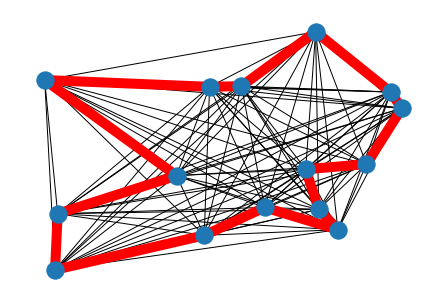

In [13]:
# draw graph
nx.draw(g, pos=node_positions)
# draw highlighted path
path_edges = [[permutation[i], permutation[i+1]] for i in range(len(permutation)-1)]
last_path_edge = [permutation[-1], permutation[0]]
path_edges.append(last_path_edge)
nx.draw_networkx_edges(G=g,pos=node_positions,edgelist=path_edges, edge_color ='r', width=10)

In [14]:
# add solution to graph as a feature/attribute
solution_dict = {edge: 0 for edge in list(g.edges())}
for edge in path_edges:
    solution_dict[tuple(edge)] = 1
nx.set_edge_attributes(G=g, values=solution_dict, name="solution")
g.edges(data=True)

EdgeDataView([(0, 1, {'distance': 0.3398382317970126, 'solution': 0}), (0, 2, {'distance': 0.3658722472972147, 'solution': 0}), (0, 3, {'distance': 0.3714226493914689, 'solution': 0}), (0, 4, {'distance': 0.4831111058650873, 'solution': 0}), (0, 5, {'distance': 0.2677416758455995, 'solution': 0}), (0, 6, {'distance': 0.309973506146822, 'solution': 1}), (0, 7, {'distance': 0.25613621254488106, 'solution': 0}), (0, 8, {'distance': 0.3015448850569215, 'solution': 0}), (0, 9, {'distance': 0.36833416767778954, 'solution': 0}), (0, 10, {'distance': 0.43547535967798223, 'solution': 0}), (0, 11, {'distance': 0.609753353472565, 'solution': 0}), (0, 12, {'distance': 0.059846302006949764, 'solution': 1}), (0, 13, {'distance': 0.4686746488026402, 'solution': 0}), (0, 14, {'distance': 0.41331206036546825, 'solution': 0}), (1, 2, {'distance': 0.05220198699278421, 'solution': 1}), (1, 3, {'distance': 0.21617786892250287, 'solution': 0}), (1, 4, {'distance': 0.41552632747936885, 'solution': 0}), (1, 5

In [15]:
# Convert the graph into PyTorch geometric
pyg_graph = from_networkx(g)
pyg_graph


Data(x=[15], edge_index=[2, 210], y=[15], distance=[210], solution=[210])

In [16]:
pyg_graph.solution


tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [17]:
# save nx graph in GML format
graph_filename = "temp_nx_graph.gml"
graph_filepath = "./data/" + graph_filename
nx.write_gml(G=g, path=graph_filepath)

FileNotFoundError: [Errno 2] No such file or directory: './data/temp_nx_graph.gml'

In [ ]:
# read nx graph back from GML file
nx_graph_from_gml = nx.read_gml(path=graph_filepath, destringizer=int)

In [ ]:
# verify that graph read is the same that was written
g_edge_view = g.edges(data=True)
gml_g_edge_view = nx_graph_from_gml.edges(data=True)
str(g_edge_view) == str(gml_g_edge_view)